In [1]:
## isolation forest
import pandas as pd
import matplotlib.pyplot as plt
import json
from read_json import read_json, as_json  # for json files
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np


In [2]:
data = pd.read_csv("data_sample.csv")


In [3]:
data_host = data["host"].map(read_json)

In [4]:
def find_string(string, obj):
    # finds string in object
    return string in obj

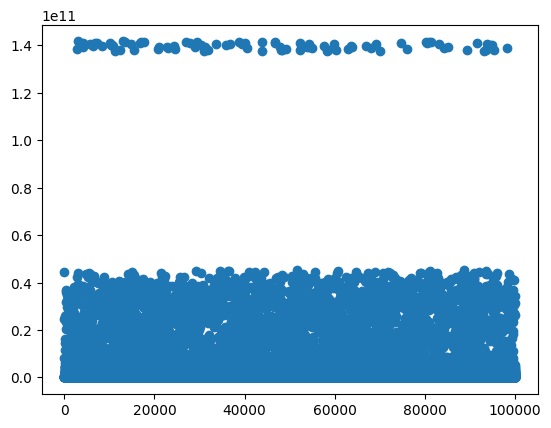

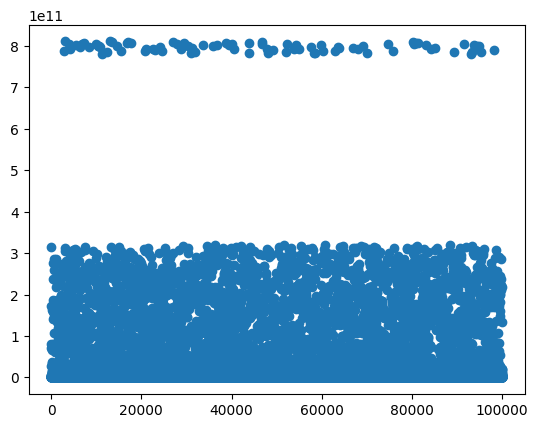

In [43]:
# extract hostnames
hostnames = data["host"].unique()
hostnames = list(map(read_json, hostnames))
hostnames_values = np.array([list(hostnames[i].values()) for i in range(len(hostnames))])
data["host"] == hostnames[0]
# "network" in data["system"][0]

id_float = data.system.map(lambda x: isinstance(x, float))
id_string = data.system.map(lambda x: isinstance(x, str))  # shoudl be ~id_string
id_nan = data.system.isna()
# all system.network is nan
id_network = data.loc[id_string]["event"].map(lambda x: "network" in x)
# get network values
network_values = data.loc[id_string][id_network]["system"].map(lambda x: as_json(x))
#out_bytes = 
out_bytes = network_values.map(lambda x: x["network"]["out"]["bytes"])
in_bytes  = network_values.map(lambda x: x["network"]["in"]["bytes"])

plt.scatter(in_bytes.index, in_bytes)
plt.show()
plt.scatter(out_bytes.index, out_bytes)
plt.show()